# **1.Conectamos Colab con Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !pip install tensorflow==2.3.0
# !pip install keras==2.4.3

In [3]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 6.0 MB/s 


In [4]:
import os
import sys
PATH_ORIGEN = "/content/drive/MyDrive/Proyectos-independientes/Proyecto-MINSA/src/CNN-LSTM"
os.chdir(PATH_ORIGEN)

In [5]:
sys.path.append(os.path.abspath(PATH_ORIGEN))

In [6]:
%matplotlib inline
import cv2
import os
import numpy as np
import keras
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from random import shuffle
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation
import visualkeras
import sys
import h5py
from PIL import ImageFont
import utils.preprocessing
import utils.model
import utils.generate
import tensorflow as tf
import shutil
import json
from torchvision import transforms
from skimage.util import random_noise
from utils.writeFileHDF import WriteFile

In [7]:
print(tf.__version__)

2.8.2


# **2. Definimos el modelo**

## **2.1.Arquitectura CNN + LSTM**

In [8]:
cnn = utils.model.DefineModelTimeDistributed(loss = "binary_crossentropy")

In [9]:
vgg16 = cnn.__call__()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 90, 90, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 90, 90, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 90, 90, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 45, 45, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 45, 45, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 45, 45, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 22, 22, 128)       0     

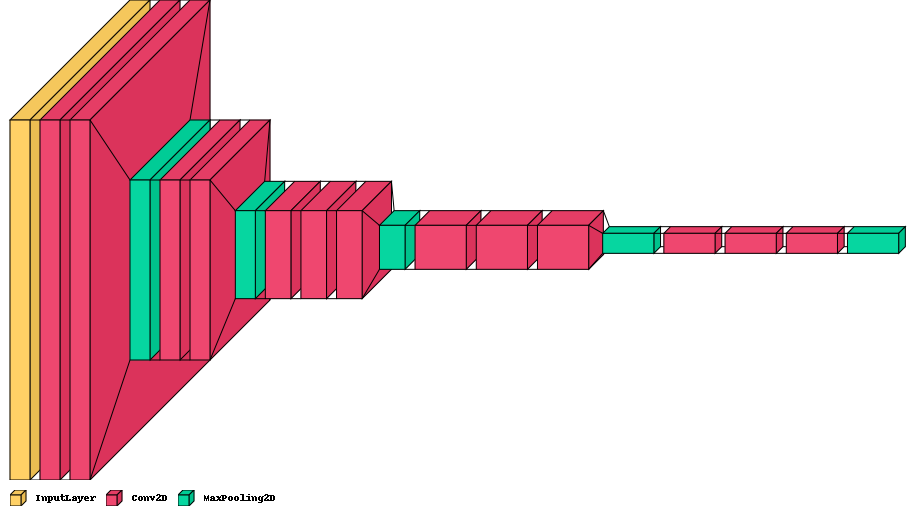

In [10]:
visualkeras.layered_view(vgg16, legend = True) # selected font

In [11]:
model_end = cnn.__matchModels__(vgg16)

Model: "VGG16_with_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 155, 2, 2, 512)   14714688  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 155, 2048)        0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               859600    
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)             

## **2.2.Compilando**

In [12]:
model_end = cnn.__compile__(model_end)
print(model_end)

## **2.3.Entrenamiento**

In [13]:
PATH_ORIGEN = "/content/drive/MyDrive/Proyectos-independientes/Proyecto-MINSA/src"

In [14]:
base_dir = PATH_ORIGEN + "/Data/BRATS-2015/Procesado/HDF/"

with open(base_dir + "config.json") as json_file:
    config = json.load(json_file)

In [15]:
# Generando dataset de entrenamiento y validacion
train_generator = utils.generate.VideoDataGenerator(config["train"], 
                                           base_dir + "train/", 
                                           batch_size = 4, 
                                           dim = (90, 90), 
                                           verbose = 0)
valid_generator = utils.generate.VideoDataGenerator(config["validation"], 
                                            base_dir + "validation/", 
                                            batch_size = 4, 
                                            dim = (90, 90), 
                                            verbose = 0)

In [16]:
print(tf.__version__)

2.8.2


In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [ ]:
history = cnn.__training__(model_end,train_generator,valid_generator)

Fit model on training data
Epoch 1/10
3/3 [==============================] - ETA: 0s - loss: 118597.9609 - accuracy: 0.3333 
Epoch 1: saving model to /content/drive/MyDrive/Proyectos-independientes/Proyecto-MINSA/src/CNN-LSTM/weights/model-0001-nan.hdf5
3/3 [==============================] - 770s 285s/step - loss: 118597.9609 - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.1667
Epoch 2/10
3/3 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5833  
Epoch 2: saving model to /content/drive/MyDrive/Proyectos-independientes/Proyecto-MINSA/src/CNN-LSTM/weights/model-0002-nan.hdf5
3/3 [==============================] - 720s 259s/step - loss: nan - accuracy: 0.5833 - val_loss: nan - val_accuracy: 0.0833
Epoch 3/10
2/3 [===================>..........] - ETA: 2:52 - loss: nan - accuracy: 0.5000